In [1]:
conda install -c conda-forge yfinance

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Download BTC Prices from Yahoo Finance [Date Range: 01/01/2015 - 12/31/2023]**

In [3]:
data = yf.download('BTC-USD','2015-01-01','2023-12-31')

[*********************100%%**********************]  1 of 1 completed


**Convert downloaded data into Pandas' DataFrame**

In [4]:
data = pd.DataFrame(data)

In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014


**Let's reset the "Date" index to index**

In [14]:
data.reset_index(inplace=True)

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
3281,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
3282,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3283,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3284,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [5]:
data.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace=True)

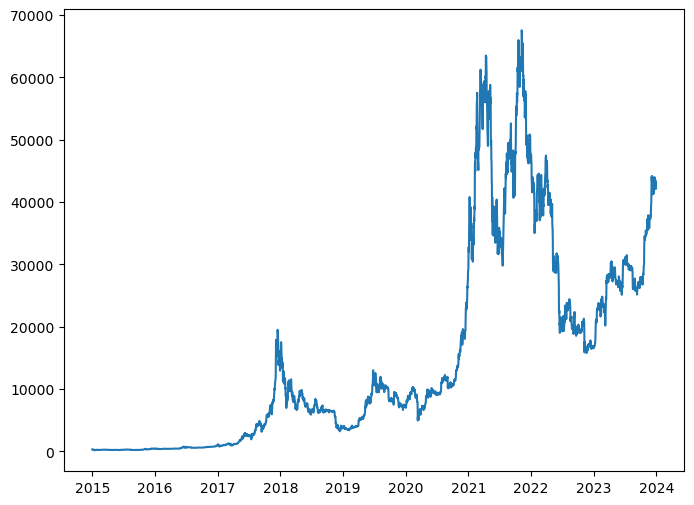

In [6]:
plt.figure(figsize=(8,6))
plt.plot(data)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
train_data = data[:-100]
test_data = data[-100:]

In [14]:
train_data.shape

(3186, 1)

In [15]:
test_data.shape

(100, 1)

In [ ]:
train_data_scale = scaler.fit_transform(train_data)

In [19]:
base_days = 100

In [20]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [23]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [27]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
97/97 [==============================] - 12s 108ms/step - loss: 0.0129
Epoch 2/50
97/97 [==============================] - 11s 114ms/step - loss: 0.0055
Epoch 3/50
97/97 [==============================] - 11s 112ms/step - loss: 0.0044
Epoch 4/50
97/97 [==============================] - 11s 112ms/step - loss: 0.0042
Epoch 5/50
97/97 [==============================] - 11s 114ms/step - loss: 0.0035
Epoch 6/50
97/97 [==============================] - 11s 115ms/step - loss: 0.0034
Epoch 7/50
97/97 [==============================] - 12s 123ms/step - loss: 0.0031
Epoch 8/50
97/97 [==============================] - 12s 120ms/step - loss: 0.0030
Epoch 9/50
97/97 [==============================] - 11s 115ms/step - loss: 0.0031
Epoch 10/50
97/97 [==============================] - 11s 114ms/step - loss: 0.0031
Epoch 11/50
97/97 [==============================] - 11s 115ms/step - loss: 0.0030
Epoch 12/50
97/97 [==============================] - 11s 112ms/step - loss: 0.0029
Epoch 13/50
9

In [28]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [29]:
test_data

,Close
0,25124.675781
1,25576.394531
2,26327.462891
3,26510.675781
4,26336.212891
...,...
195,42520.402344
196,43442.855469
197,42627.855469
198,42099.402344


In [ ]:
test_data_scale = scaler.transform(test_data)

In [31]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [32]:
x, y = np.array(x), np.array(y)

In [33]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [34]:
pred = model.predict(x)

4/4 [==============================] - 0s 24ms/step


In [35]:
pred = scaler.inverse_transform(pred)

In [36]:
pred

array([[28144.855],
       [28100.184],
       [27962.123],
       [27747.43 ],
       [27501.812],
       [27267.93 ],
       [27098.436],
       [27088.867],
       [27242.826],
       [27507.828],
       [27917.383],
       [28371.363],
       [28746.504],
       [29010.219],
       [29114.28 ],
       [29121.518],
       [29090.42 ],
       [29051.824],
       [28981.545],
       [28856.914],
       [28641.514],
       [28348.31 ],
       [28039.861],
       [27782.385],
       [27651.406],
       [27815.629],
       [28270.379],
       [28872.385],
       [29493.242],
       [30122.412],
       [30724.615],
       [31231.455],
       [31925.193],
       [32925.58 ],
       [34150.727],
       [35290.965],
       [36056.617],
       [36369.188],
       [36344.484],
       [36115.414],
       [35825.36 ],
       [35667.598],
       [35643.984],
       [35686.688],
       [35788.496],
       [35924.812],
       [36064.38 ],
       [36231.87 ],
       [36442.44 ],
       [36796.85 ],


**future Bitcoin Price**

In [37]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 [==============================] - 0s 20ms/step


In [38]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [39]:
z

array([[43688.68369615],
       [43632.80764643],
       [43860.87881161],
       [44278.81045538],
       [44790.92925247],
       [45338.80454403],
       [45895.74146797],
       [46451.29665364],
       [47000.51351666],
       [47539.56817669],
       [48064.64478675],
       [48572.16046739],
       [49059.14287463],
       [49523.35070048],
       [49963.24957277],
       [50377.85138797],
       [50766.66611101],
       [51129.54914137],
       [51466.7414799 ],
       [51778.78939522],
       [52067.17905932],
       [52333.45287771],
       [52579.03275546],
       [52805.28436413],
       [53013.54927518],
       [53205.1208599 ],
       [53381.23625604],
       [53543.14063472],
       [53691.83013283],
       [53828.35712081]])

In [40]:
model.save('Bitcoin_Price_prediction_Model.keras')